<a href="https://colab.research.google.com/github/moqri/Aging-Cell-Morphology/blob/master/plot_raw_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
image_file='AMC-24--001-macurato.tif'
url='https://github.com/moqri/Aging-Cell-Morphology/blob/master/'+image_file+'?raw=true'
import urllib.request
urllib.request.urlretrieve(url, image_file)

('AMC-24--001-macurato.tif', <http.client.HTTPMessage at 0x7fc9e0f7ce48>)

In [3]:
from PIL import Image
import numpy as np
imarray = np.array(Image.open(image_file))
imarray.shape   ############### THERE ARE THREE CHANNELS!

(1040, 1388, 3)

In [0]:
from skimage import color, util
img_hed = color.rgb2hed(imarray)
img_hema = img_hed[:, :, 0]
img_eosin = img_hed[:, :, 1]
img_dab = img_hed[:, :, 2]

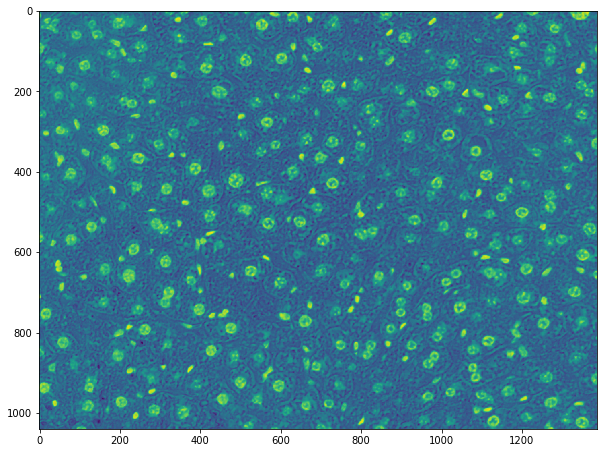

In [24]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(10, 10))
plt.imshow(img_hema)

In [42]:
frame.max()

-0.8426075753204274

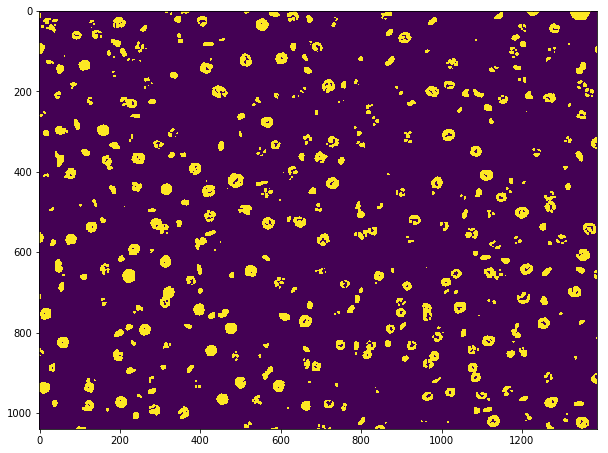

In [78]:
    import cv2
  
    # Blur image to remove noise
    frame=cv2.GaussianBlur(img_hema, (3, 3), 0)
 
    # Switch image from BGR colorspace to HSV
    #hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # define range of black color in HSV
    bmin = (-.9)
    bmax = (-.8)
    
    # Sets pixels to white if in black range, else will be set to black
    mask = cv2.inRange(frame, bmin, bmax)
        
    # Bitwise-AND of mask and black only image - only used for display
    #res = cv2.bitwise_and(frame, frame, mask= mask)
 
    #mask = cv2.erode(mask, None, iterations=1)
    # commented out erode call, detection more accurate without it
 
    # dilate makes the in range areas larger
    mask = cv2.dilate(mask, None, iterations=1)
    f = plt.figure(figsize=(10, 10))
    plt.imshow(mask)

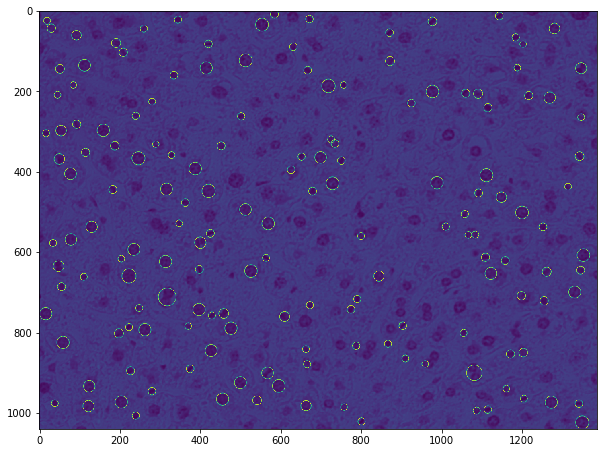

In [95]:

    # Set up the SimpleBlobdetector with default parameters.
    params = cv2.SimpleBlobDetector_Params()
     
    # Change thresholds
    params.minThreshold = 0;
    params.maxThreshold = 256;
     
    # Filter by Area.
    params.filterByArea = True
    params.minArea = 200
     
    # Filter by Circularity
    params.filterByCircularity = True
    params.minCircularity = 0.5
     
    # Filter by Convexity
    params.filterByConvexity = True
    params.minConvexity = 0.1
     
    # Filter by Inertia
    params.filterByInertia =True
    params.minInertiaRatio = 0.1
     
    detector = cv2.SimpleBlobDetector_create(params)
 
    # Detect blobs.
    reversemask=255-mask
    keypoints = detector.detect(reversemask)
    img_with_keypoints = cv2.drawKeypoints(imarray, keypoints, outImage=np.array([]), color=(255, 0, 0),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    f = plt.figure(figsize=(10, 10))
    plt.imshow(img_with_keypoints[:,:,0])